In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
data.info()
#data.notnull().count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [13]:
data['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

In [14]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [15]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [17]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.665471,1.094918,0.204783,1.514948,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.105572,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


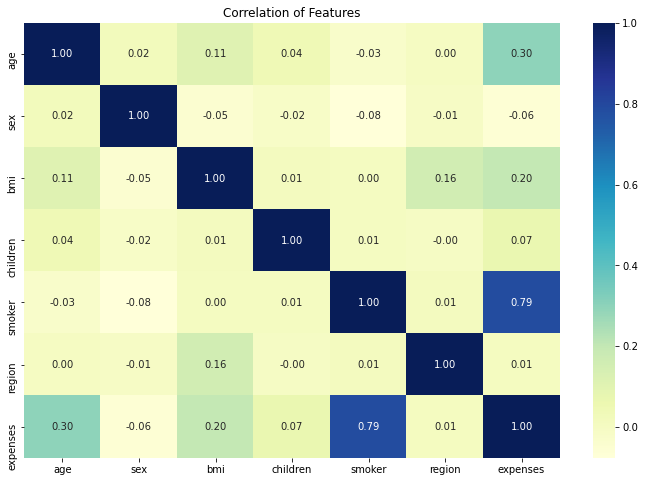

In [20]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,cmap='YlGnBu',annot=True,fmt=".2f",ax=ax)
plt.title("Correlation of Features")
plt.show()

here, we can see smoker is highly correlated with expenses and also age, bmi plays important role.

<AxesSubplot:title={'center':'Age vs expenses'}, xlabel='age', ylabel='expenses'>

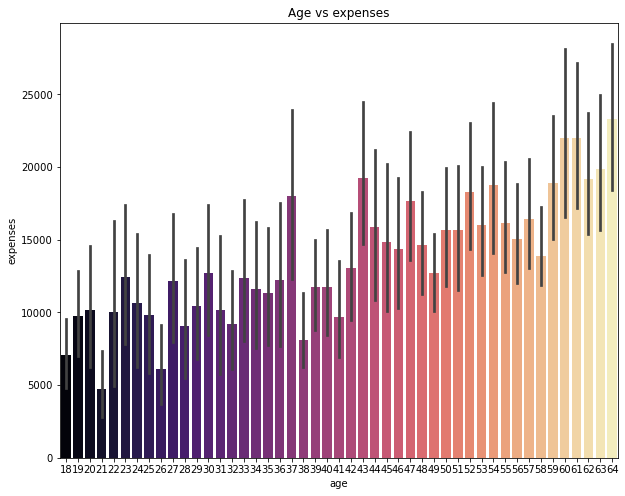

In [55]:
plt.figure(figsize=(10,8))
plt.title('Age vs expenses')
sns.barplot(x='age',y='expenses',data=data_copy,palette='magma')

<AxesSubplot:title={'center':'Region vs Expenses'}, xlabel='region', ylabel='expenses'>

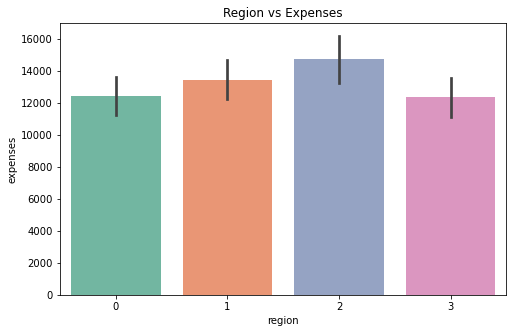

In [53]:
plt.figure(figsize=(8,5))
plt.title('Region vs Expenses')
sns.barplot(x='region',y='expenses',data=data_copy,palette='Set2')

<AxesSubplot:title={'center':'Sex vs Expenses'}, xlabel='sex', ylabel='expenses'>

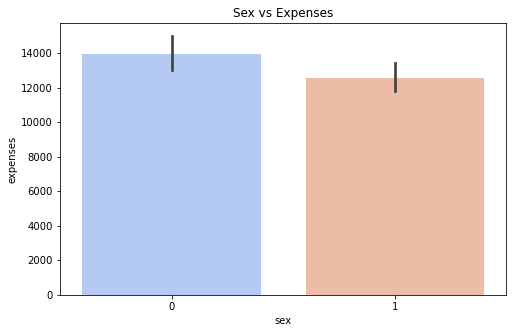

In [58]:
plt.figure(figsize=(8,5))
plt.title('Sex vs Expenses')
sns.barplot(x='sex',y='expenses',data=data_copy,palette='coolwarm')

<AxesSubplot:title={'center':'Smoker vs Expenses'}, xlabel='smoker', ylabel='expenses'>

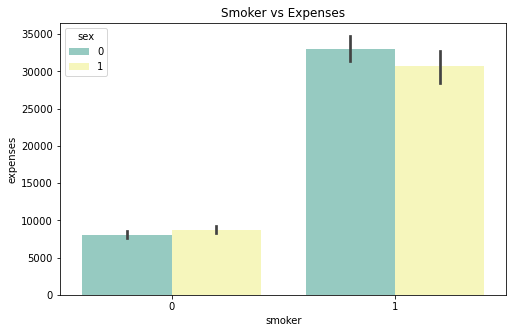

In [52]:
plt.figure(figsize=(8,5))
plt.title('Smoker vs Expenses')
sns.barplot(x='smoker',y='expenses',data=data_copy,palette='Set3',hue='sex')

<AxesSubplot:title={'center':'BMI VS expenses'}, xlabel='bmi', ylabel='expenses'>

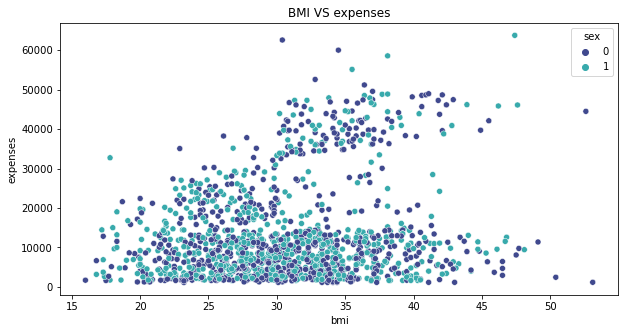

In [73]:
plt.figure(figsize=(10,5))
plt.title('BMI VS expenses')
sns.scatterplot(x='bmi',y='expenses',hue='sex',data=data_copy,palette='mako')

In [62]:
print("Skewness and Kurtosis for all feature: ")
print("----------------------------------------")
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Skewness and Kurtosis for all feature: 
----------------------------------------
age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.285 and  Kurtosis -0.053
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
expenses : Skewness 1.516 and  Kurtosis 1.606


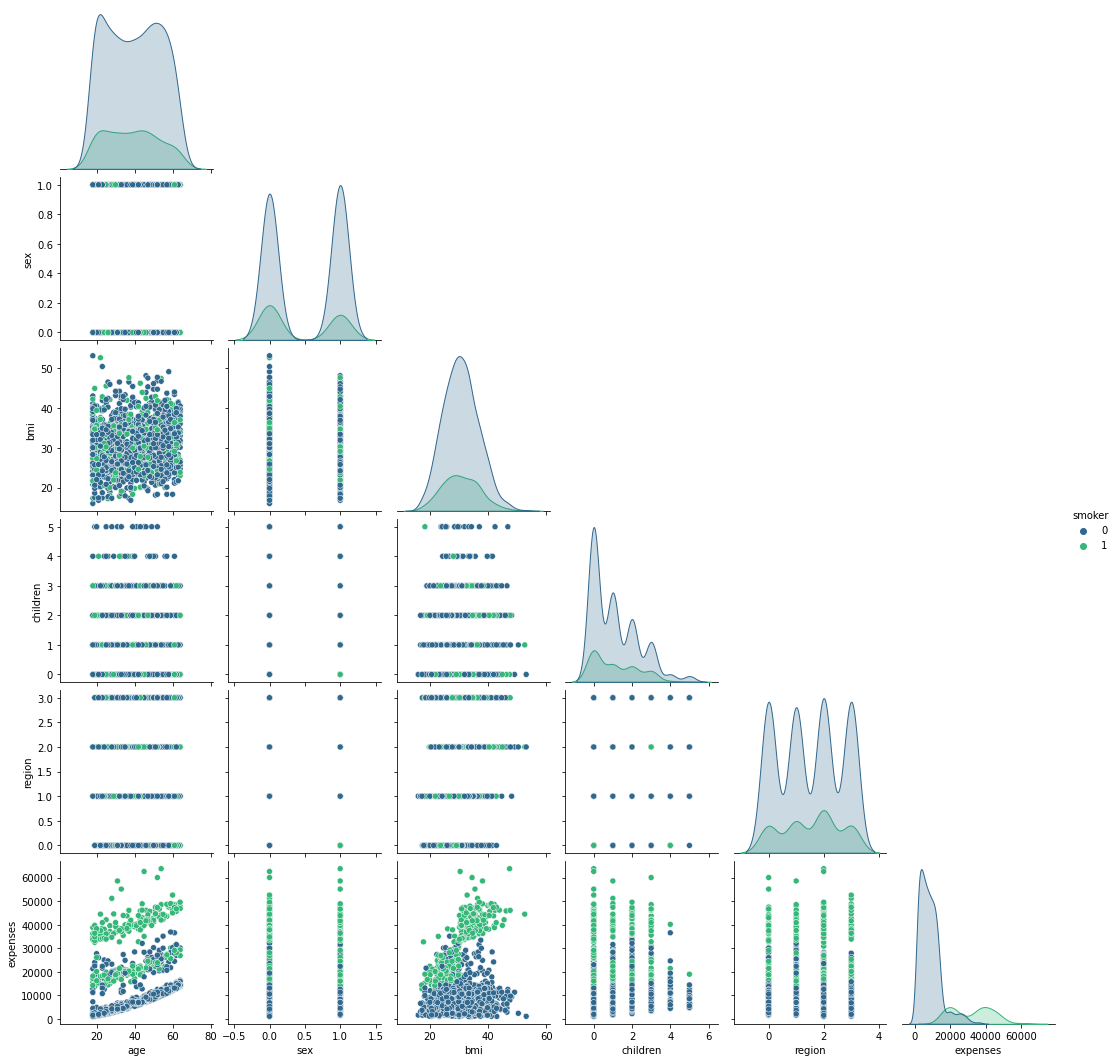

In [75]:
sns.pairplot(data=data_copy , hue = "smoker",corner = True,palette = 'viridis')

as age,bmi increases, expenses increases

as conclusion, smoker , age , bmi plays essential role in this dataset as expenses increases as it's increase and region, chidren, sex are not playing much role here as others features are playing.